In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading The Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [43]:
european_countries = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", 
    "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", 
    "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Georgia", 
    "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", 
    "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", 
    "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", "Norway", 
    "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia", 
    "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom", 
    "Vatican City"
]

df_DA_europe = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'].isin(european_countries))].copy().dropna(subset='salary_year_avg')
df_skills = df_DA_europe.explode('job_skills')
df_salary = df_skills.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by = 'count' ,ascending = False)
df_salary = df_salary.rename(columns = {'count' : 'skill_count' , 'median' : 'median_salary'})
df_salary['skill_percentage'] = df_salary['skill_count'] / len(df_DA_europe) * 100
df_skill_demand  = df_salary[df_salary['skill_percentage'] > 6]

In [44]:
df_skill_demand

,skill_count,median_salary,skill_percentage
job_skills,,,
sql,248,98500.0,49.899396
python,179,98500.0,36.016097
excel,127,72900.0,25.553320
tableau,122,98500.0,24.547284
power bi,78,89100.0,15.694165
r,66,98500.0,13.279678
azure,52,99500.0,10.462777
looker,45,111175.0,9.054326
spark,41,105000.0,8.249497


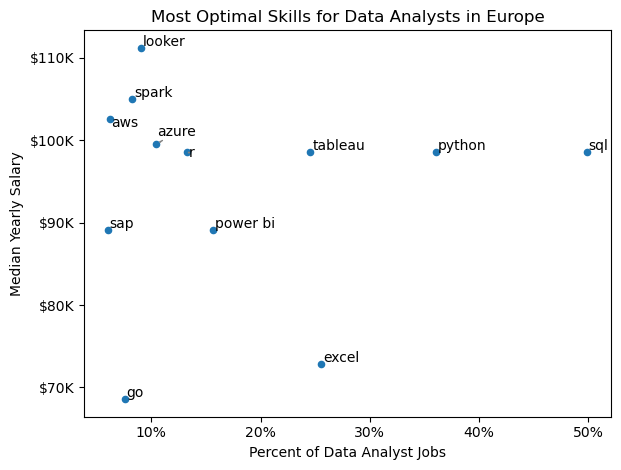

In [49]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_skill_demand.plot(kind='scatter', x='skill_percentage', y='median_salary')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title(f'Most Optimal Skills for Data Analysts in Europe')
plt.tight_layout()



# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_skill_demand.index):
    texts.append(plt.text(df_skill_demand['skill_percentage'].iloc[i], df_skill_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))



plt.show()

In [72]:
df_technology = df['job_type_skills'].copy()
df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()

#combine all dictionaries into one
technology_dict = {}
for row in df_technology :
    row_dict = ast.literal_eval(row)
    for key,value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value 

for key,value in technology_dict.items():
    technology_dict[key] = list(set(value))

    

In [76]:
technology = pd.DataFrame(list(technology_dict.items()) , columns = ['technology' , 'skills'])   
technology = technology.explode('skills')   
technology     

,technology,skills
0,analyst_tools,nuix
0,analyst_tools,tableau
0,analyst_tools,outlook
0,analyst_tools,cognos
0,analyst_tools,alteryx
...,...,...
9,sync,rocketchat
9,sync,symphony
9,sync,mattermost
9,sync,google chat


In [77]:
df_plot = df_skill_demand.merge(technology , left_on = 'job_skills' , right_on = 'skills')
df_plot

,skill_count,median_salary,skill_percentage,technology,skills
0,248,98500.0,49.899396,programming,sql
1,179,98500.0,36.016097,programming,python
2,127,72900.0,25.553320,analyst_tools,excel
3,122,98500.0,24.547284,analyst_tools,tableau
4,78,89100.0,15.694165,analyst_tools,power bi
5,66,98500.0,13.279678,programming,r
6,52,99500.0,10.462777,cloud,azure
7,45,111175.0,9.054326,analyst_tools,looker
8,41,105000.0,8.249497,libraries,spark
9,38,68584.5,7.645875,programming,go


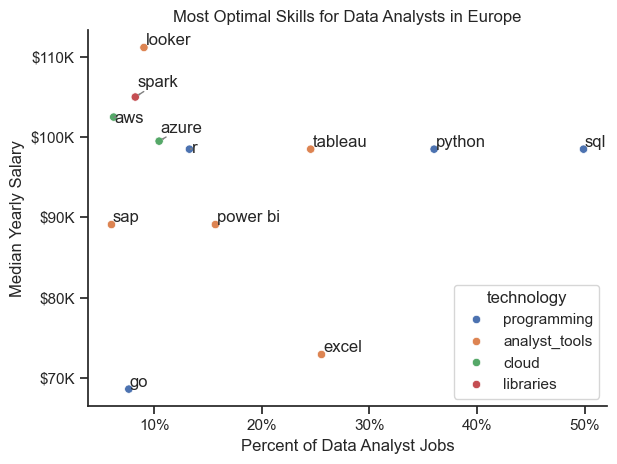

In [79]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

sns.scatterplot(
    data = df_plot , 
    x ='skill_percentage' ,
    y = 'median_salary',
    hue = 'technology' )
sns.set_theme(style = 'ticks')
sns.despine()
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title(f'Most Optimal Skills for Data Analysts in Europe')
plt.tight_layout()



# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_skill_demand.index):
    texts.append(plt.text(df_skill_demand['skill_percentage'].iloc[i], df_skill_demand['median_salary'].iloc[i], txt))
    

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))